In [1]:
import os
import sys

notebook_dir = os.path.abspath('')
sys.path.append(os.path.join(notebook_dir, '..'))

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from keras_core import utils
from aepy.data.datasets import load_MNIST
from aepy.data.utils import evaluate, display_diff
from aepy.models.base.default_architectures import (VanillaEncoder,VanillaDecoder)
from aepy.models.cae.cae_model import CAE
from aepy.pipelines.training import TrainingPipeline

Using TensorFlow backend


2023-12-18 13:15:13.371917: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load MNIST dataset
x_train, y_train, x_test, y_test = load_MNIST(persistant=True)

#x_train = np.expand_dims(x_train, -1).astype("float32") / 255
#x_test = np.expand_dims(x_test, -1).astype("float32") / 255
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Obtaint number of clasess
n_classes = len(set(y_train))

# Convert labels to categorical
y_train = utils.to_categorical(y_train, n_classes)
y_test = utils.to_categorical(y_test, n_classes)

2023-12-18 13:15:16 [INFO]: train-images-idx3-ubyte.gz already exists.
2023-12-18 13:15:16 [INFO]: train-labels-idx1-ubyte.gz already exists.
2023-12-18 13:15:16 [INFO]: t10k-images-idx3-ubyte.gz already exists.
2023-12-18 13:15:16 [INFO]: t10k-labels-idx1-ubyte.gz already exists.


In [3]:
train_data = dict(data=x_train.astype(float), labels=y_train)
test_data = dict(data=x_test.astype(float), labels=y_test)

In [4]:
# Model creation
model = CAE(input_dim=x_train.shape[1], latent_dim=2,
            encoder=VanillaEncoder, decoder=VanillaDecoder, layers_conf=[32, 64])

In [5]:
x_train.shape

(60000, 784)

In [6]:
pipe = TrainingPipeline(name='training_pipeline',
                        model=model, num_epochs=10)

trained_model = pipe(train_data=train_data)

2023-12-18 13:15:17 [INFO]: +++ training_pipeline +++
2023-12-18 13:15:17 [INFO]: Creating folder in ../output_dir/training_pipeline_2023-12-18_13-15-17


Epoch 1/10

Epoch 1: total_loss improved from inf to 7224.25391, saving model to ../output_dir/training_pipeline_2023-12-18_13-15-17/model.weights.h5
469/469 - 34s - 72ms/step - contractive_loss: 0.3785 - reconstruction_loss: 7223.9048 - total_loss: 7224.2539
Epoch 2/10

Epoch 2: total_loss improved from 7224.25391 to 7217.06348, saving model to ../output_dir/training_pipeline_2023-12-18_13-15-17/model.weights.h5
469/469 - 3s - 6ms/step - contractive_loss: 0.0000e+00 - reconstruction_loss: 7217.2681 - total_loss: 7217.0635
Epoch 3/10

Epoch 3: total_loss improved from 7217.06348 to 7217.05176, saving model to ../output_dir/training_pipeline_2023-12-18_13-15-17/model.weights.h5
469/469 - 3s - 6ms/step - contractive_loss: 0.0000e+00 - reconstruction_loss: 7216.8740 - total_loss: 7217.0518
Epoch 4/10

Epoch 4: total_loss improved from 7217.05176 to 7217.05029, saving model to ../output_dir/training_pipeline_2023-12-18_13-15-17/model.weights.h5
469/469 - 3s - 6ms/step - contractive_loss: 0

In [7]:
y_hat = trained_model.predict(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


(10000, 784)
(10000, 784)


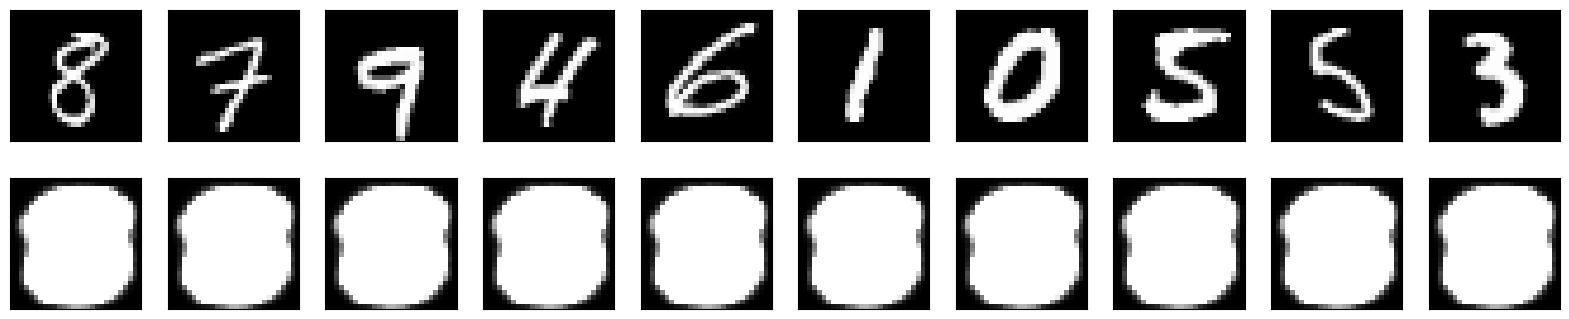

In [8]:
print(x_test.shape)
print(y_hat['recon'].shape)
display_diff(x_test, y_hat['recon'])